# Classification Task

## Importing libraries


In [21]:
import os
import numpy as np
import pandas as pd

# Statistical libraries
from scipy import stats

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Classification methods
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import VotingClassifier

# Evaluation Metrics
from sklearn.metrics import *

## Utility functions

In [22]:
def PrintConfusionMatrix(model, true_y, predicted_y, positive=1, negative=-1):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])    

def PrintSignificance(stat, c):
    if (stat[1]<(1-c)):
        print("The difference is statistically significant (cf %3.2f p-value=%.4f)"%(c,stat[1]))
    else:
        print("The difference is not statistically significant (cf %3.2f p-value=%.4f)"%(c,stat[1]))        

## Load Data

In [23]:
current_directory = os.getcwd()
file_name = 'Clustered_df.csv'
data_raw = pd.read_csv(os.path.join(current_directory, file_name), index_col="Unnamed: 0")
# print(data)


# Scaling
to_be_scaled = ['Age', 'Education', 'Income', 'Affective Symptoms', 'Rumination', 'Behavioural Symptoms',
                'Anxiety Personal Impact', 'Attribution Skepticism', 'Impact Skepticism', 
                'Trend Skepticism',  'Response Skepticism']
not_scaled = [column for column in data_raw.columns if column not in to_be_scaled]



scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_raw[to_be_scaled])
std_df = pd.DataFrame(standardized_data, columns = to_be_scaled)
data = pd.concat((std_df[to_be_scaled[:3]], data_raw[not_scaled], std_df[to_be_scaled[3:]]), axis=1)
joblib.dump(scaler, 'scaler')

target_variable = 'Cluster'
input_variables = data.columns[data.columns!=target_variable]


print(data)

          Age  Education    Income   Male  Female  Non-binary  Single  \
0    0.286984  -1.697573 -1.196971  False    True       False   False   
1    1.126806   0.727364 -0.661472  False   False       False   False   
2    0.100356  -1.137972 -2.053770   True   False       False   False   
3   -1.859231   2.033099  0.195326   True   False       False   False   
4    0.286984  -0.205304  1.159224  False   False        True   False   
..        ...        ...       ...    ...     ...         ...     ...   
155 -0.926094   0.727364 -0.447273  False   False        True    True   
156  0.100356  -0.205304 -0.233073  False    True       False   False   
157  0.100356  -0.205304 -0.340173   True   False       False    True   
158  0.193670  -1.137972 -1.946670  False    True       False   False   
159  1.500061  -1.137972  0.323739   True   False       False   False   

     Married  Divorced  Widowed  Separated  Cluster  Affective Symptoms  \
0       True     False    False      False      

In [24]:
X = data[input_variables]
y = data[target_variable]
labels_unique = np.unique(y)
print(X.info(), y.info())
print(labels_unique)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      160 non-null    float64
 1   Education                160 non-null    float64
 2   Income                   160 non-null    float64
 3   Male                     160 non-null    bool   
 4   Female                   160 non-null    bool   
 5   Non-binary               160 non-null    bool   
 6   Single                   160 non-null    bool   
 7   Married                  160 non-null    bool   
 8   Divorced                 160 non-null    bool   
 9   Widowed                  160 non-null    bool   
 10  Separated                160 non-null    bool   
 11  Affective Symptoms       160 non-null    float64
 12  Rumination               160 non-null    float64
 13  Behavioural Symptoms     160 non-null    float64
 14  Anxiety Personal Impact  1

## Train and test splitting

In [25]:
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/4.0, random_state =1234, shuffle=True)
crossvalidation = StratifiedKFold(n_splits=10, shuffle=True)
print(X_train, y_train)

          Age  Education    Income   Male  Female  Non-binary  Single  \
88  -1.952544   1.473498  0.837925  False    True       False   False   
93  -0.739467   1.473498  1.073544   True   False       False   False   
48  -1.019408   2.033099  0.945025  False   False       False    True   
97   0.286984  -1.137972  0.302426   True   False       False   False   
43   1.033493   0.727364 -0.982772  False   False       False   False   
..        ...        ...       ...    ...     ...         ...     ...   
152  0.940179  -0.205304  0.195326  False   False       False   False   
116  1.313434  -0.205304 -1.196971  False    True       False   False   
53  -0.272898  -0.205304 -0.340173  False   False       False   False   
38   0.286984  -1.137972  0.945025  False   False       False   False   
47   1.500061  -1.137972 -0.125973  False    True       False   False   

     Married  Divorced  Widowed  Separated  Affective Symptoms  Rumination  \
88     False     False    False      False   

In [26]:
print("Class %2d  %.1f%%\nClass %2d  %.1f%%\nClass %2d  %.1f%%\n"%((y.value_counts()/y.shape[0]).index[0],100*(y.value_counts()/y.shape[0]).values[0],(y.value_counts()/y.shape[0]).index[1],100*(y.value_counts()/y.shape[0]).values[1],(y.value_counts()/y.shape[0]).index[2], 100*(y.value_counts()/y.shape[0]).values[2]))


Class  3  33.8%
Class  2  33.1%
Class  1  33.1%



## Methods definition and computation of metrics

In [27]:
n_estimators = 50

methods = {
    'Lasso': LogisticRegression(penalty="l1", C=100, random_state=1234, max_iter=300, solver="liblinear", multi_class="ovr"),
    'NaiveBayes': GaussianNB(),
    'k-NN(5)': KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree'),
    'Decision Tree': DecisionTreeClassifier(max_depth=None),
    'Bagging(Tree)': BaggingClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators),
    'Bagging(kNN)': BaggingClassifier(KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree'), n_estimators=n_estimators),
    'Random Forest': RandomForestClassifier(n_estimators=n_estimators, max_depth=3, oob_score=True),
    'Extremely Randomized Trees': ExtraTreesClassifier(n_estimators=n_estimators, max_depth=3),
    'Ada Boost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators)
}


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

xval_results = {}
roc_results = {}
feature_importance_model = {}

method = []
accuracy_mean = []
accuracy_std = []
precision = []
recall = []
f1 = []
auc = []

for method_name in methods:
    clf = methods[method_name]
    
    # Evaluate the model using cross-validation
    xval_score = cross_val_score(clf, X, y, cv=crossvalidation, scoring='accuracy')
    
    # Store the raw results of cross-validation that we might want to use for t-test/mann-whitney comparison
    xval_results[method_name] = xval_score
    
    # Compute the basic statistics
    accuracy_mean.append(np.average(xval_score))
    accuracy_std.append(np.std(xval_score))
    
    clf.fit(X_train, y_train)

    # If the model can return an evaluation of feature importance, store it to analyze it later
    if hasattr(clf, 'feature_importances_'):
        feature_importance_model[method_name] = (clf, clf.feature_importances_)
    
    # Compute the predictions
    yp = clf.predict(X_test)
    
    # Compute the probabilities for each class
    yprob = clf.predict_proba(X_test)
    
    # Compute the data needed to draw the ROC curve
    # Note: ROC and AUC are not typically used for multi-class classification, so you may want to omit this part.
    
    # Compute the precision, recall, and F1-score
    precision.append(precision_score(y_test, yp, average='macro'))
    recall.append(recall_score(y_test, yp, average='macro'))
    f1.append(f1_score(y_test, yp, average='macro'))
    
    print("%40s" % method_name)
    print("========================================")
    print("\t  Accuracy (CV) %.3f %.3f" % (np.average(xval_score), np.std(xval_score)))
    print("\tAccuracy (Test) %.3f" % accuracy_score(y_test, yp))
    print("\t      Precision %.3f" % precision[-1])
    print("\t      Recall    %.3f" % recall[-1])
    print("\t      F1        %.3f" % f1[-1])
    print("\n")

    method.append(method_name)


                                   Lasso
	  Accuracy (CV) 0.969 0.042
	Accuracy (Test) 0.925
	      Precision 0.920
	      Recall    0.914
	      F1        0.915


                              NaiveBayes
	  Accuracy (CV) 0.988 0.025
	Accuracy (Test) 0.975
	      Precision 0.981
	      Recall    0.967
	      F1        0.973


                                 k-NN(5)
	  Accuracy (CV) 0.988 0.025
	Accuracy (Test) 0.975
	      Precision 0.970
	      Recall    0.980
	      F1        0.974




                           Decision Tree
	  Accuracy (CV) 0.975 0.041
	Accuracy (Test) 0.975
	      Precision 0.970
	      Recall    0.980
	      F1        0.974


                           Bagging(Tree)
	  Accuracy (CV) 0.994 0.019
	Accuracy (Test) 0.975
	      Precision 0.970
	      Recall    0.980
	      F1        0.974


                            Bagging(kNN)
	  Accuracy (CV) 0.988 0.025
	Accuracy (Test) 0.975
	      Precision 0.970
	      Recall    0.980
	      F1        0.974


                           Random Forest
	  Accuracy (CV) 0.994 0.019
	Accuracy (Test) 0.975
	      Precision 0.970
	      Recall    0.980
	      F1        0.974


              Extremely Randomized Trees
	  Accuracy (CV) 0.994 0.019
	Accuracy (Test) 0.975
	      Precision 0.970
	      Recall    0.980
	      F1        0.974


                               Ada Boost
	  Accuracy (CV) 0.981 0.029
	Accuracy (Test) 0.975
	      Precision 0.970
	      Recall    0.980
	      F1        0.974




In [29]:
result_summary_extra = pd.DataFrame({'Model':method,'Accuracy (Mean)':accuracy_mean,'Accuracy (Std)':accuracy_std,'Precision':precision,'Recall':recall,'F1':f1})
# result_summary_extra.to_csv('LoanSafety-Summary-Extra.csv')

## Statistical comparison

In [30]:
result_summary = pd.DataFrame({'Model':method,'Accuracy (Mean)':accuracy_mean,'Accuracy (Std)':accuracy_std,'Precision':precision,'Recall':recall,'F1':f1})
# result_summary.to_csv('LoanSafety-Summary.csv')
result_summary

,Model,Accuracy (Mean),Accuracy (Std),Precision,Recall,F1
0,Lasso,0.96875,0.041926,0.919546,0.913725,0.915415
1,NaiveBayes,0.98750,0.025000,0.981481,0.966667,0.972932
2,k-NN(5),0.98750,0.025000,0.969697,0.980392,0.974026
3,Decision Tree,0.97500,0.041458,0.969697,0.980392,0.974026
4,Bagging(Tree),0.99375,0.018750,0.969697,0.980392,0.974026
5,Bagging(kNN),0.98750,0.025000,0.969697,0.980392,0.974026
6,Random Forest,0.99375,0.018750,0.969697,0.980392,0.974026
7,Extremely Randomized Trees,0.99375,0.018750,0.969697,0.980392,0.974026
8,Ada Boost,0.98125,0.028641,0.969697,0.980392,0.974026


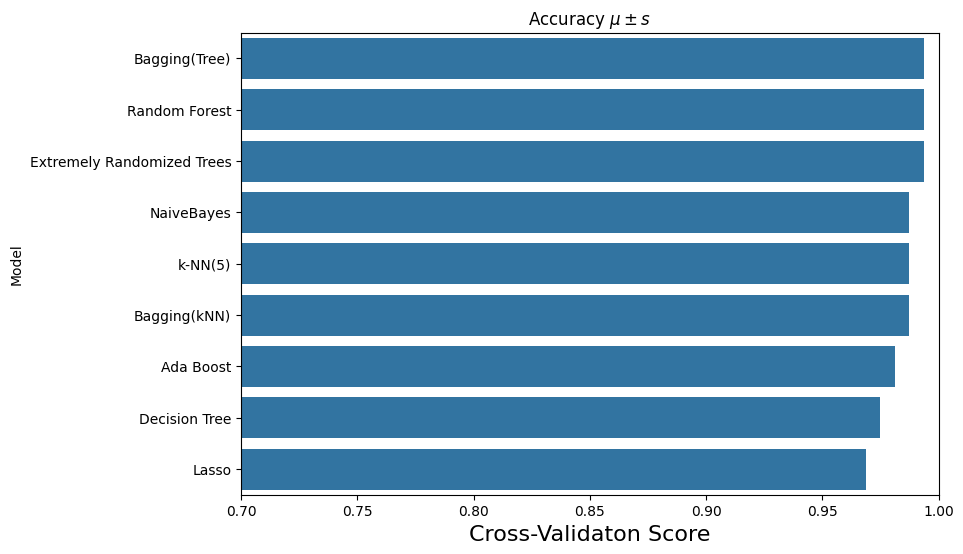

In [31]:
f, axe = plt.subplots(1,1, figsize=(9,6))

result_summary.sort_values(by=['Accuracy (Mean)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy (Mean)', y='Model', data = result_summary, errorbar='sd', ax = axe)
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_title("Accuracy $\mu\pm s$")
axe.set_xlim(0.7,1)
plt.show()

## Random Forest

In [32]:
# Create a Random Forest classifier
import joblib
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=123)

# Perform multi-class classification with cross-validation
# crossvalidation = 5  # Number of cross-validation folds
crossvalidation = StratifiedKFold(n_splits=10, shuffle=True)
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=crossvalidation, scoring='accuracy')

In [33]:
# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()
print(f"Mean Accuracy: {mean_score:.2f}")
print(f"Standard Deviation: {std_score:.2f}")


Cross-Validation Scores: [1.     1.     1.     0.9375 1.     1.     1.     1.     1.     1.    ]
Mean Accuracy: 0.99
Standard Deviation: 0.02


In [34]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [35]:

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

rf_classifier.fit(X,y)


joblib.dump(rf_classifier, "classifier")



Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        13
           3       0.91      1.00      0.95        10

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



['classifier']